In [71]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib.table import table
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import jinja2
import re
import tabulate
import ridgeplot as rg
import nbformat
from sympy import true

import seaborn as sns
import plotly.io as pio
pio.renderers.default = "notebook"
from IPython.display import IFrame
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
#Okay, we have our standardized street names. Now we start seeing how many crashes each has.
df = pd.read_csv("2012-24_Crash_Events_std_street_names_dataset.csv")



/tmp/ipykernel_17158/30606242.py:25: DtypeWarning:

Columns (0: CaseNumber) have mixed types. Specify dtype option on import or set low_memory=False.



In [72]:
df['Serious_and_Fatal_Injuries'] = df['NumberOfFatalities'] + df['NumberOfSeriousInjuries']

pared_df = []

df['OnStreet_standardized'].value_counts()





OnStreet_standardized
INTERSTATE 490     10404
WEST RIDGE ROAD     6218
MONROE AVENUE       5260
LAKE AVENUE         4991
DEWEY AVENUE        4871
                   ...  
STATE ROUTE 269        1
STATE ROUTE 52         1
STATE ROUTE 70         1
STATE ROUTE 71         1
GREYST                 1
Name: count, Length: 6330, dtype: int64

In [73]:
freqtb_y = pd.crosstab(df["Serious_and_Fatal_Injuries"], df["OnStreet_standardized"])
freqtb_y


OnStreet_standardized,390,9 MILE POINT ROAD,AAB STREET,ABBOT STREET,ABBOTSWOOD CRESCENT,ABBOTT STREET,ABERDEEN STREET,ABINGTON ROAD,ACADEMY DRIVE,ACHILLES STREET,...,ZELLWEGER BEACH,ZELLWEGER BEACH ROAD,ZENA STREET,ZIEGLER STREET,ZIMBRICH STREET,ZIMMER STREET,ZOO ROAD,ZORNOW DRIVE,ZUBER ROAD,ZYGMENT STREET
Serious_and_Fatal_Injuries,,,,,,,,,,,,,,,,,,,,,
0,2,12,13,2,1,5,35,17,1,3,...,1,2,2,5,10,2,4,2,2,4
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


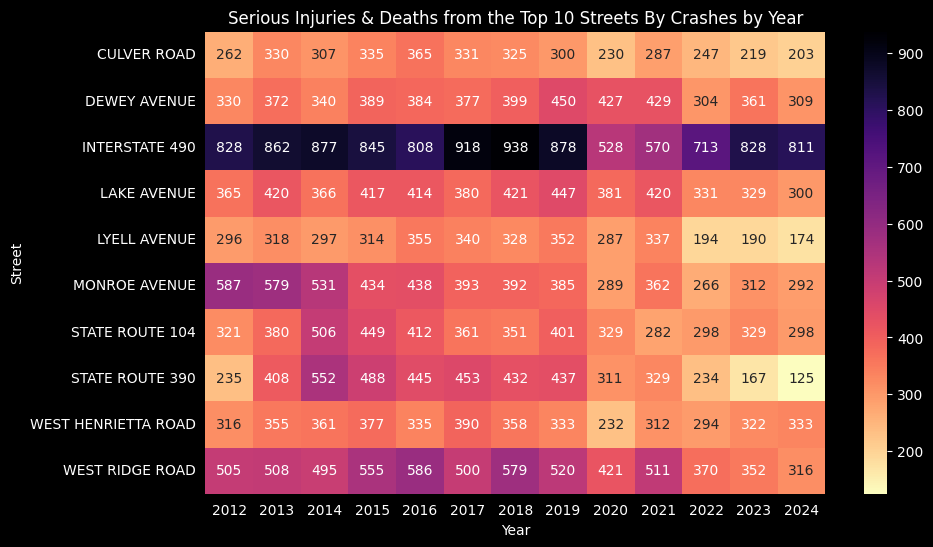

In [74]:
TCT10_i = df["OnStreet_standardized"].value_counts().head(10).index
TCT10 = df[df["OnStreet_standardized"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["OnStreet_standardized"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Serious Injuries & Deaths from the Top 10 Streets By Crashes by Year")
plt.xlabel("Year")
plt.ylabel("Street")
plt.show()

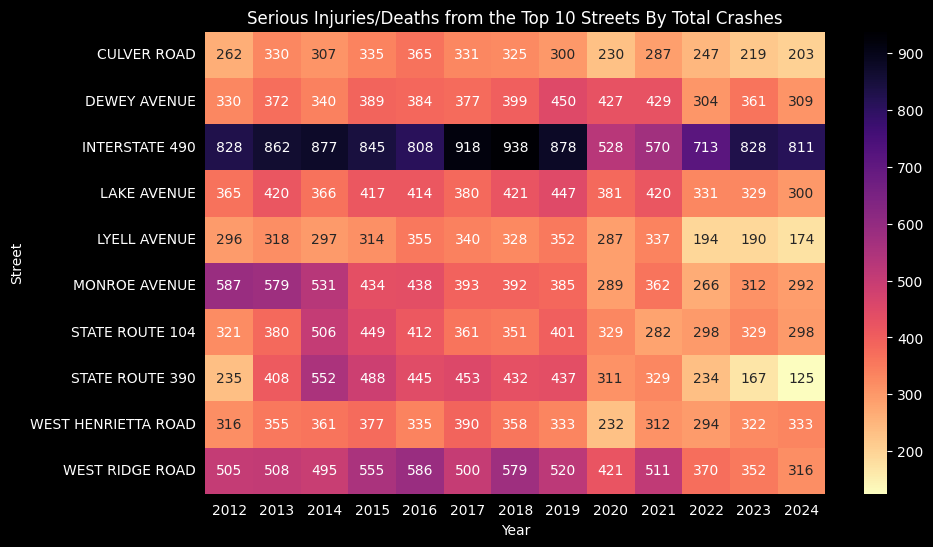

In [75]:
dropped_df = df[df.OnStreet_standardized != "UNKNOWN"]

TCT10_i = dropped_df["OnStreet_standardized"].value_counts().head(10).index
TCT10 = dropped_df[dropped_df["OnStreet_standardized"].isin(TCT10_i)]
freqtb10_y = pd.crosstab(TCT10["CaseYear"], TCT10["OnStreet_standardized"])

plt.figure(figsize=(10, 6))
sns.heatmap(freqtb10_y.T, annot = True, fmt="d", cmap="magma_r")
plt.title("Serious Injuries/Deaths from the Top 10 Streets By Total Crashes")
plt.xlabel("Year")
plt.ylabel("Street")
plt.show()

In [78]:
#top streets by number of serious injuries or deaths
streets = dropped_df["OnStreet_standardized"].unique()

totalseriousinj = []

for street in streets:
    totalseriousinj.append([street, dropped_df[(dropped_df['OnStreet_standardized']==street)].Serious_and_Fatal_Injuries.sum()])
totalseriousinj


[['STATE ROUTE 104', np.int64(134)],
 ['STATE ROUTE 15A', np.int64(0)],
 ['FIRST STREET', np.int64(4)],
 ['STATE ROUTE 251', np.int64(1)],
 ['SECOND AVENUE', np.int64(0)],
 ['SECOND STREET', np.int64(0)],
 ['STATE ROUTE 31F', np.int64(2)],
 ['STATE ROUTE 33', np.int64(20)],
 ['390', np.int64(0)],
 ['THIRD STREET', np.int64(0)],
 ['STATE ROUTE 441', np.int64(20)],
 ['INTERSTATE 490', np.int64(229)],
 ['FOURTH AVENUE', np.int64(0)],
 ['FOURTH SECTION ROAD', np.int64(20)],
 ['FOURTH STREET', np.int64(1)],
 ['INTERSTATE 590', np.int64(37)],
 ['FIFTH STREET', np.int64(1)],
 ['STATE ROUTE 65', np.int64(2)],
 ['SIXTH STREET', np.int64(0)],
 ['SEVENTH STREET', np.int64(1)],
 ['EIGHTH STREET', np.int64(0)],
 ['9 MILE POINT ROAD', np.int64(0)],
 ['AAB STREET', np.int64(0)],
 ['ABBOT STREET', np.int64(0)],
 ['ABBOTSWOOD CRESCENT', np.int64(0)],
 ['ABBOTT STREET', np.int64(0)],
 ['ABERDEEN STREET', np.int64(0)],
 ['ABINGTON ROAD', np.int64(1)],
 ['ACADEMY DRIVE', np.int64(0)],
 ['ACHILLES STREET',

In [ ]:
with open('gfg.txt', 'w+') as f:

    # write elements of list
    for items in l:
        f.write('%s\n' %items)

    print("File written successfully")
# close the file
f.close()